#TASK 1 : Regression



---
##Subtask 1 : Data Import

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/CancerData.txt', sep="\t")
# Value to predict: levelCancerAntigen
target = 'levelCancerAntigen'
# Based on the following features
features = ['logCancerVol', 'logCancerWeight', 'age', 'logBenighHP',
            'svi', 'logCP', 'gleasonScore', 'gleasonS45']
data

,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


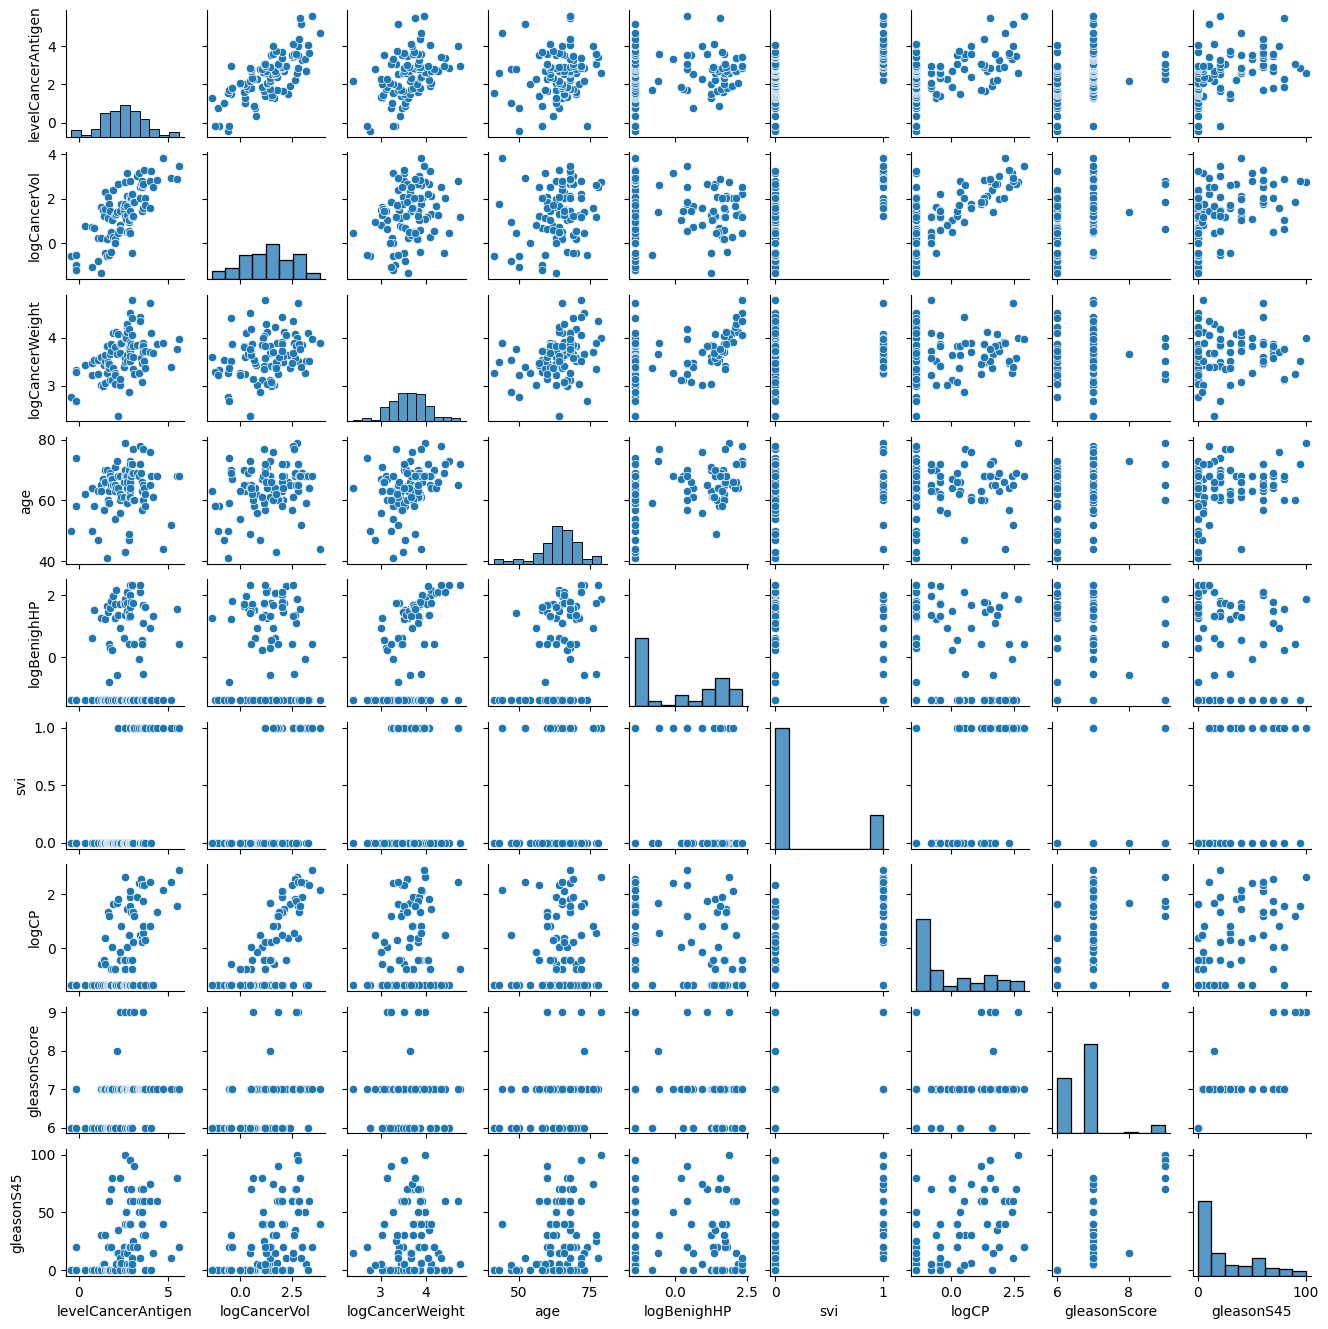

In [ ]:
sns.pairplot(data, vars=[target]+features, kind="scatter", height=1.5)

In [ ]:
data.describe()

,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               97 non-null     int64  
 1   logCancerVol        97 non-null     float64
 2   logCancerWeight     97 non-null     float64
 3   age                 97 non-null     int64  
 4   logBenighHP         97 non-null     float64
 5   svi                 97 non-null     int64  
 6   logCP               97 non-null     float64
 7   gleasonScore        97 non-null     int64  
 8   gleasonS45          97 non-null     int64  
 9   levelCancerAntigen  97 non-null     float64
 10  train               97 non-null     object 
dtypes: float64(5), int64(5), object(1)
memory usage: 8.5+ KB


---
### Data Preprocessing

In [ ]:
grouped_ = data.groupby('train')

In [ ]:
data[data.train=="T"][features].corr()

,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45
logCancerVol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
logCancerWeight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
logBenighHP,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
logCP,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleasonScore,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
gleasonS45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


**Training data**

In [ ]:
data_train = grouped_.get_group('T')
data_train

,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
90,91,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0,4.029806,T
91,92,2.532903,3.677566,61,1.348073,1,-1.386294,7,15,4.129551,T
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T


**Testing Data**

In [ ]:
data_test = grouped_.get_group('F')
data_test.head()

,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen,train
6,7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F
8,9,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319,F
9,10,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,F
14,15,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717,F
21,22,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228,F


---
### Multiple Linear Regression Models for our Prediction and Inference purposes

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
X_t, Y_t = data[features].values, data[target].values

In [ ]:
X_train = data_train.drop(columns=['levelCancerAntigen', 'train', 'index'])
X_test = data_test.drop(columns=['levelCancerAntigen', 'train', 'index'])

Y_train = data_train['levelCancerAntigen']
Y_test = data_test['levelCancerAntigen']

X = data.drop(columns=['levelCancerAntigen', 'train', 'index'])
Y = data['levelCancerAntigen']

# Spliting the training data into training and validation sets (e.g., 80% training, 20% validation)
# split_ratio = 0.8
# split_index = int(split_ratio * len(X_train))
# X_train_split = X_train[:split_index]
# Y_train_split = Y_train[:split_index]
# X_valid_split = X_train[split_index:]
# Y_valid_split = Y_train[split_index:]

**Base Error Rate**

In [ ]:
from sklearn.dummy import DummyRegressor
null_model = DummyRegressor().fit(X_train, Y_train)
base_error_rate = mean_squared_error(Y_test, null_model.predict(X_test))
print(f'Baseline Test Error: {base_error_rate:.3f}')

Baseline Test Error: 1.057


---

### Least Squares Estimates

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats

In [ ]:
scaler = StandardScaler().fit(X_t)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Applied least squares estimation to the training set, producing the estimates, standard errors and Z-scores
ls = sm.OLS(Y_train, sm.add_constant(X_train_s)).fit()
ls_params = ls.params

# Linear model fit. The Z score (t value) is the coefficient divided by its standard error
# Roughly Z score larger than two in absolute value is significantly nonzero at the p = 0.05 level.
result = zip(['Intercept'] + features, ls_params, ls.bse, ls.tvalues)
df_result_lse = pd.DataFrame(result, columns=['Term','Coefficient','Std. Error','Z Score'])
df_result_lse

,Term,Coefficient,Std. Error,Z Score
0,Intercept,2.464933,0.089315,27.598203
1,logCancerVol,0.676016,0.125975,5.366290
2,logCancerWeight,0.261694,0.095134,2.750789
3,age,-0.140734,0.100819,-1.395909
4,logBenighHP,0.209061,0.101691,2.055846
5,svi,0.303623,0.122962,2.469255
6,logCP,-0.287002,0.153731,-1.866913
7,gleasonScore,-0.021195,0.144497,-0.146681
8,gleasonS45,0.265576,0.152820,1.737840


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
y_pred = linear_reg.predict(X_test)

Mean squared Error

In [ ]:
mse = mean_squared_error(Y_test, y_pred) # Mean Squared Error (MSE)
rmse = np.sqrt(mse) # Root Mean Squared Error (RMSE)

r_squared = r2_score(Y_test, y_pred) # R-squared

# Calculating the number of observations and predictors
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1) # Adjusted R-squared

print(f'Least Squares Estimates Mean Squared Error: {mse:.4f}')
print(f'Least Squares Estimates Root Mean Squared Error: {rmse:.4f}')
print(f'Least Squares Estimates R-squared: {r_squared:.4f}')
print(f'Least Squares Estimates Adjusted R-squared: {adjusted_r_squared:.4f}')

Least Squares Estimates Mean Squared Error: 0.5213
Least Squares Estimates Root Mean Squared Error: 0.7220
Least Squares Estimates R-squared: 0.5034
Least Squares Estimates Adjusted R-squared: 0.3142


---
### Ridge Regression

In [ ]:
# Dropping the less significant columns from above analysis and creating data set to fit the model.
# X_train = X_train.drop(columns=['logCP', 'age', 'gleasonScore', 'gleasonS45'])
# X_test = X_test.drop(columns=['logCP', 'age', 'gleasonScore', 'gleasonS45'])

In [ ]:
ridge_reg = Ridge()  # alpha (regularization strength)

In [ ]:
ridge_reg.fit(X_train, Y_train)

Ridge()

In [ ]:
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
mse_ridge = mean_squared_error(Y_test, y_pred_ridge) # Mean Squared Error
rmse_ridge = np.sqrt(mse_ridge) # Root Mean Squared Error (RMSE)
r_squared_ridge = r2_score(Y_test, y_pred_ridge) # R-squared

# Calculating the number of observations and predictors
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared_ridge = 1 - (1 - r_squared_ridge) * (n - 1) / (n - p - 1) # Adjusted R-squared

# Getting the coefficients
coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_
df_ridge = pd.DataFrame(list(zip(features,coefficients)), columns=['Features', 'Coefficients'])
print(f'Ridge Regression Mean Squared Error: {mse_ridge:.4f}')
print(f'Ridge Regression Root Mean Squared Error: {rmse_ridge:.4f}')
print(f'Ridge Regression R-squared: {r_squared_ridge:.4f}')
print(f'Ridge Regression Adjusted R-squared: {adjusted_r_squared_ridge:.4f}')
print("--------------------------------------------------")
df_ridge

Ridge Regression Mean Squared Error: 0.5214
Ridge Regression Root Mean Squared Error: 0.7221
Ridge Regression R-squared: 0.5033
Ridge Regression Adjusted R-squared: 0.3140
--------------------------------------------------


,Features,Coefficients
0,logCancerVol,0.576105
1,logCancerWeight,0.574151
2,age,-0.018115
3,logBenighHP,0.146465
4,svi,0.638072
5,logCP,-0.182183
6,gleasonScore,-0.037758
7,gleasonS45,0.009533


---

### Lasso Regression

In [ ]:
lasso_reg = Lasso(alpha=0.1)

In [ ]:
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
mse_lasso = mean_squared_error(Y_test, y_pred_lasso) # Mean Squared Error
rmse_lasso = np.sqrt(mse_lasso) # Root Mean Squared Error (RMSE)
r_squared_lasso = r2_score(Y_test, y_pred_lasso) # R-squared

# Calculating the number of observations and predictors
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared_lasso = 1 - (1 - r_squared_lasso) * (n - 1) / (n - p - 1) # Adjusted R-squared

# Getting the coefficients
coefficients = lasso_reg.coef_
intercept = lasso_reg.intercept_
df_lasso = pd.DataFrame(list(zip(features,coefficients)), columns=['Features', 'Coefficients'])

print(f'Lasso Regression Mean Squared Error: {mse_lasso:.4f}')
print(f'Lasso Regression Root Mean Squared Error: {rmse_lasso:.4f}')
print(f'Lasso Regression R-squared: {r_squared_lasso:.4f}')
print(f'Lasso Regression Adjusted R-squared: {adjusted_r_squared_lasso:.4f}')
print("---------------------------------------------------")
df_lasso

Lasso Regression Mean Squared Error: 0.5316
Lasso Regression Root Mean Squared Error: 0.7291
Lasso Regression R-squared: 0.4935
Lasso Regression Adjusted R-squared: 0.3006
---------------------------------------------------


,Features,Coefficients
0,logCancerVol,0.538986
1,logCancerWeight,0.184891
2,age,-0.006352
3,logBenighHP,0.128433
4,svi,0.000000
5,logCP,-0.000000
6,gleasonScore,-0.000000
7,gleasonS45,0.007727


---
### Cross Validation in Ridge regression and Lasso regression

In [ ]:
from sklearn.model_selection import GridSearchCV
# Defining a range of alpha (lambda) values to search over
alphas = [0.001, 0.01, 0.1, 0.2, 0.5, 1]

# Creating a Ridge regression model
ridge = Ridge()

# Performing cross-validation to find the best alpha (lambda) using GridSearchCV
ridge_cv = GridSearchCV(ridge, {'alpha': alphas}, cv=5, scoring='r2')
ridge_cv.fit(X_train, Y_train)

# Getting the best alpha
best_alpha_ridge_gsv = ridge_cv.best_params_['alpha']

# Training the Ridge model with the best alpha
ridge_model = Ridge(alpha=best_alpha_ridge_gsv)
ridge_model.fit(X_train, Y_train)

# Evaluating the Ridge model
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(Y_test, ridge_predictions)
coeff_gsv_r = ridge_model.coef_
df_gsv_r = pd.DataFrame(list(zip(features,coeff_gsv_r)), columns=['Features', 'Coefficients'])
print(f'Ridge Mean Squared Error: {ridge_mse:.4f}')
print(f'Best Alpha (Lambda) found by cross-validation with GSV: {best_alpha_ridge_gsv}')
print("---------------------------------------------------------")
df_gsv_r

Ridge Mean Squared Error: 0.5214
Best Alpha (Lambda) found by cross-validation with GSV: 1
---------------------------------------------------------


,Features,Coefficients
0,logCancerVol,0.576105
1,logCancerWeight,0.574151
2,age,-0.018115
3,logBenighHP,0.146465
4,svi,0.638072
5,logCP,-0.182183
6,gleasonScore,-0.037758
7,gleasonS45,0.009533


In [ ]:
# Creating a Lasso regression model
lasso = Lasso()

# Performing cross-validation to find the best alpha (lambda)
lasso_cv = GridSearchCV(lasso, {'alpha': alphas}, cv=5, scoring='r2')
lasso_cv.fit(X_train, Y_train)

# Getting the best alpha
best_alpha_lasso_gsv = lasso_cv.best_params_['alpha']

# Training the Lasso model with the best alpha
lasso_model = Lasso(alpha=best_alpha_lasso_gsv)
lasso_model.fit(X_train, Y_train)

# Evaluating the Lasso model
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(Y_test, lasso_predictions)
coeff_gsv_l = lasso_model.coef_
df_gsv_l = pd.DataFrame(list(zip(features,coeff_gsv_l)), columns=['Features', 'Coefficients'])
print(f'Lasso Mean Squared Error: {lasso_mse:.4f}')
print(f'Best Alpha (Lambda) found by cross-validation with GSV: {best_alpha_lasso_gsv}')
print("-----------------------------------------------------------")
df_gsv_l

Lasso Mean Squared Error: 0.5086
Best Alpha (Lambda) found by cross-validation with GSV: 0.01
-----------------------------------------------------------


,Features,Coefficients
0,logCancerVol,0.567198
1,logCancerWeight,0.578207
2,age,-0.018063
3,logBenighHP,0.142198
4,svi,0.626892
5,logCP,-0.167787
6,gleasonScore,-0.000000
7,gleasonS45,0.008618


---
### **Without using Built In Methods for Cross validation.**

Ridge Cross Validation

---------------------------------------
Mean Prediction for Alpha 0.001: 0.1980
Standard Error For Alpha 0.001: 0.0791
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 0.01: 0.1979
Standard Error For Alpha 0.01: 0.0791
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 0.1: 0.1975
Standard Error For Alpha 0.1: 0.0790
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 0.2: 0.1970
Standard Error For Alpha 0.2: 0.0789
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 0.5: 0.1956
Standard Error For Alpha 0.5: 0.0785
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 1: 0.1937
Standard Error For Alpha 1: 0.0781
---------------------------------------
------------------------------------------------------------


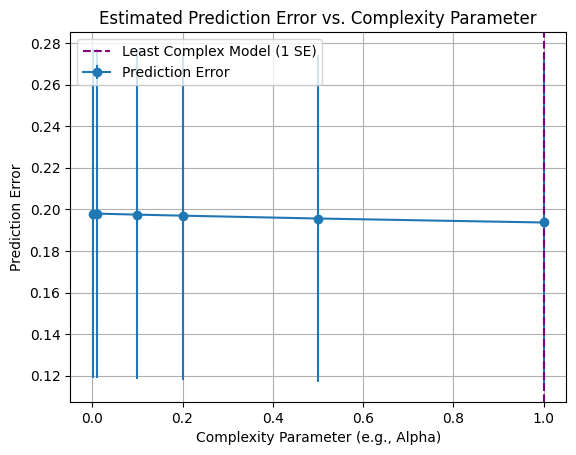

------------------------------------------------------------
Best Alpha Ridge Regression for Cross-Validation : 1
One Standard Error for Ridge : 0.0781
Least Complex Model within 1 Standard Error : 1


In [ ]:
# from scipy.stats import zscore
from sklearn.model_selection import KFold

X = data_train.drop(columns=['levelCancerAntigen', 'train'])
y = data_train['levelCancerAntigen']

# X = X.apply(zscore)

# Defining a range of complexity parameters (e.g., alpha values)
alphas = [0.001, 0.01, 0.1, 0.2, 0.5, 1]

# Creating lists to store prediction errors and standard errors
prediction_errors = []
standard_errors = []

# Defining the number of folds for cross-validation
num_folds = 10

# Creating a KFold object
kf = KFold(n_splits=num_folds)

for alpha in alphas:
    # Creating and fitting a Ridge model with the current alpha
    model = Ridge(alpha=alpha)

    # Lists to store the mean squared errors for each fold
    mse_per_fold = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_fold = mean_squared_error(y_test, y_pred)
        mse_per_fold.append(mse_fold)

    # Calculating the mean prediction error for this alpha
    mean_mse = np.mean(mse_per_fold)
    print("---------------------------------------")
    print(f"Mean Prediction for Alpha {alpha}: {mean_mse:.4f}")

    # Calculating the standard error for this alpha
    std_error = np.std(mse_per_fold) / np.sqrt(num_folds)
    print(f"Standard Error For Alpha {alpha}: {std_error:.4f}")
    print("---------------------------------------")

    prediction_errors.append(mean_mse)
    standard_errors.append(std_error)

# Plotting prediction error curves with standard errors
plt.errorbar(alphas, prediction_errors, yerr=standard_errors, fmt='-o', label='Prediction Error')
plt.xlabel('Complexity Parameter (e.g., Alpha)')
plt.ylabel('Prediction Error')
plt.title('Estimated Prediction Error vs. Complexity Parameter')
plt.grid(True)
plt.legend()

# Identifying the least complex model within one standard error of the best
best_alpha_index = np.argmin(prediction_errors)
best_alpha_ridge = alphas[best_alpha_index]
one_std_error_ridge = standard_errors[best_alpha_index]
least_complex_alpha = None

for alpha, error in zip(alphas, prediction_errors):
    if error <= (prediction_errors[best_alpha_index] + one_std_error_ridge):
        least_complex_alpha = alpha

if least_complex_alpha is not None:
    plt.axvline(least_complex_alpha, color='purple', linestyle='--', label='Least Complex Model (1 SE)')
print("------------------------------------------------------------")
plt.legend()
plt.show()
print("------------------------------------------------------------")
print(f'Best Alpha Ridge Regression for Cross-Validation : {best_alpha_ridge}')
print(f'One Standard Error for Ridge : {one_std_error_ridge:.4f}')
print(f'Least Complex Model within 1 Standard Error : {least_complex_alpha}')



---
Lasso Cross Validation

---------------------------------------
Mean Prediction for Alpha 0.001: 0.1961
Standard Error For Alpha 0.001: 0.0788
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 0.01: 0.1837
Standard Error For Alpha 0.01: 0.0773
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 0.1: 0.1823
Standard Error For Alpha 0.1: 0.0802
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 0.2: 0.1791
Standard Error For Alpha 0.2: 0.0801
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 0.5: 0.1792
Standard Error For Alpha 0.5: 0.0828
---------------------------------------
---------------------------------------
Mean Prediction for Alpha 1: 0.1839
Standard Error For Alpha 1: 0.0903
---------------------------------------
------------------------------------------------------------


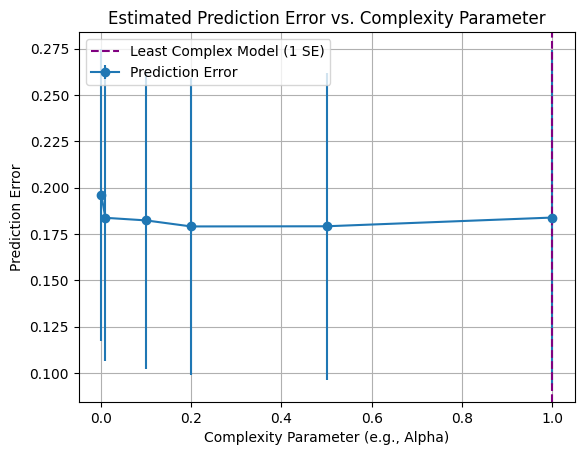

------------------------------------------------------------
Best Alpha Lasso Regression for Cross-Validation : 0.2
One Standard Error for Lasso : 0.0801
Least Complex Model within 1 Standard Error : 1


In [ ]:
# from scipy.stats import zscore

X = data_train.drop(columns=['levelCancerAntigen', 'train'])
y = data_train['levelCancerAntigen']

# X = X.apply(zscore)

# Defining a range of complexity parameters (e.g., alpha values)
alphas = [0.001, 0.01, 0.1, 0.2, 0.5, 1]

# Creating lists to store prediction errors and standard errors
prediction_errors = []
standard_errors = []

# Defining the number of folds for cross-validation
num_folds = 10

# Creating a KFold object
kf = KFold(n_splits=num_folds)

for alpha in alphas:
    # Creating and fit a Lasso model with the current alpha
    model = Lasso(alpha=alpha)

    # Lists to store the mean squared errors for each fold
    mse_per_fold = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_fold = mean_squared_error(y_test, y_pred)
        mse_per_fold.append(mse_fold)

    # Calculating the mean prediction error for this alpha
    mean_mse = np.mean(mse_per_fold)
    print("---------------------------------------")
    print(f"Mean Prediction for Alpha {alpha}: {mean_mse:.4f}")

    # Calculating the standard error for this alpha
    std_error = np.std(mse_per_fold) / np.sqrt(num_folds)
    print(f"Standard Error For Alpha {alpha}: {std_error:.4f}")
    print("---------------------------------------")

    prediction_errors.append(mean_mse)
    standard_errors.append(std_error)

# Plotting prediction error curves with standard errors
plt.errorbar(alphas, prediction_errors, yerr=standard_errors, fmt='-o', label='Prediction Error')
plt.xlabel('Complexity Parameter (e.g., Alpha)')
plt.ylabel('Prediction Error')
plt.title('Estimated Prediction Error vs. Complexity Parameter')
plt.grid(True)
plt.legend()

# Identifying the least complex model within one standard error of the best
best_alpha_index = np.argmin(prediction_errors)
best_alpha_lasso = alphas[best_alpha_index]
one_std_error_lasso = standard_errors[best_alpha_index]
least_complex_alpha = None

for alpha, error in zip(alphas, prediction_errors):
    if error <= (prediction_errors[best_alpha_index] + one_std_error_lasso):
        least_complex_alpha = alpha

if least_complex_alpha is not None:
    plt.axvline(least_complex_alpha, color='purple', linestyle='--', label='Least Complex Model (1 SE)')
print("------------------------------------------------------------")
plt.legend()
plt.show()
print("------------------------------------------------------------")
print(f'Best Alpha Lasso Regression for Cross-Validation : {best_alpha_lasso}')
print(f'One Standard Error for Lasso : {one_std_error_lasso:.4f}')
print(f'Least Complex Model within 1 Standard Error : {least_complex_alpha}')

---
### Model Selection


In [ ]:
from sklearn.model_selection import KFold

# Spliting the data into predictors (X) and the target variable (y)
X = data_train.drop(columns=['levelCancerAntigen', 'train','index'])
y = data_train['levelCancerAntigen']

# Defining the number of folds for cross-validation
num_folds = 15

# Creating an array to store MSE for each model
mse_results = []
coefficients = []

# Creating a list to store model names
models = ["LSE", "Ridge", "Lasso"]

# Defining the cross-validation strategy using KFold
kf = KFold(n_splits=num_folds)

for model_name, model in zip(models, [LinearRegression(), Ridge(alpha=best_alpha_ridge), Lasso(alpha=best_alpha_lasso)]):
    fold_mse = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fitting the model to the training data
        model.fit(X_train, y_train)
        coefficients.append(model.coef_)

        # Making predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculating the mean squared error for this fold
        mse = mean_squared_error(y_val, y_pred)
        fold_mse.append(mse)

    # Calculating the average MSE across folds for this model
    avg_mse = np.mean(fold_mse)
    mse_results.append(avg_mse)

# Displaying the results
for model_name, mse in zip(models, mse_results):
    print(f"{model_name} Mean Squared Error: {mse:.4f}")

df_3_models = pd.DataFrame(list(zip(features,coefficients[0], coefficients[1], coefficients[2])), columns=['Features', 'LSE', 'Ridge', 'Lasso'])
df_3_models

LSE Mean Squared Error: 0.6756
Ridge Mean Squared Error: 0.6671
Lasso Mean Squared Error: 0.8819


,Features,LSE,Ridge,Lasso
0,logCancerVol,0.464434,0.610850,0.638173
1,logCancerWeight,0.508604,0.561580,0.560404
2,age,-0.017401,-0.021710,-0.012674
3,logBenighHP,0.096915,0.153139,0.116421
4,svi,0.821291,0.708446,0.640543
5,logCP,-0.197592,-0.229734,-0.209283
6,gleasonScore,-0.066133,-0.050846,-0.068132
7,gleasonS45,0.008711,0.009755,0.008470


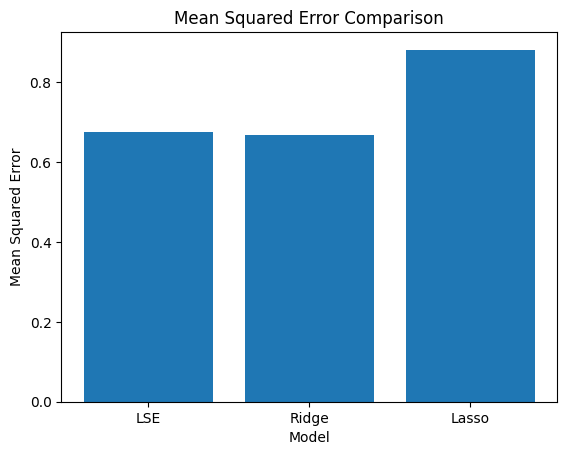

In [ ]:
import matplotlib.pyplot as plt

plt.bar(models, mse_results)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison')
plt.show()

---
### Comparison Between the 3 Models

In [ ]:
import matplotlib.pyplot as plt

X_train = data_train.drop(columns=['levelCancerAntigen', 'train', 'index'])
X_test = data_test.drop(columns=['levelCancerAntigen', 'train', 'index'])

Y_train = data_train['levelCancerAntigen']
Y_test = data_test['levelCancerAntigen']

linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, Y_train)

lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, Y_train)


Lasso(alpha=0.2)

---
**Least Squared Estimate Model**


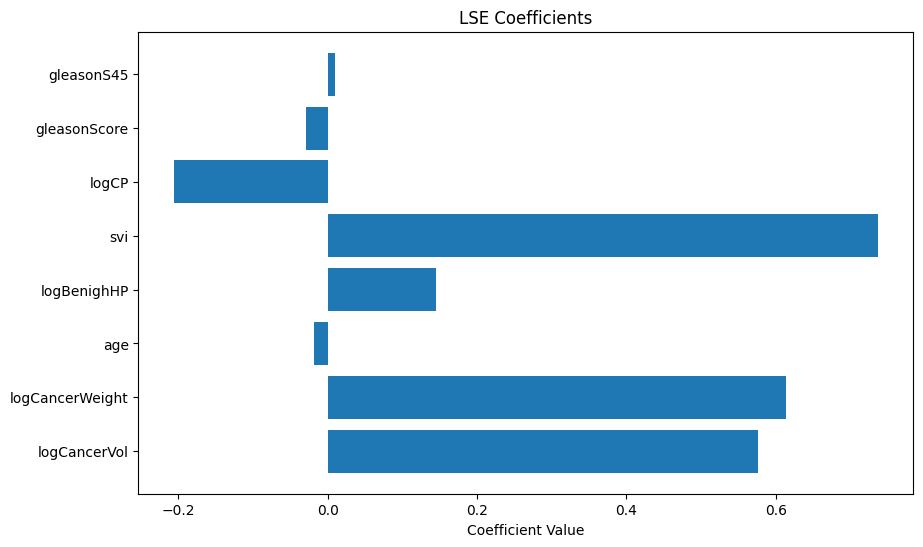

,Clinical Measures,Coefficients
0,logCancerVol,0.576543
1,logCancerWeight,0.614020
2,age,-0.019001
3,logBenighHP,0.144848
4,svi,0.737209
5,logCP,-0.206324
6,gleasonScore,-0.029503
7,gleasonS45,0.009465


In [ ]:
# Access the coefficients of the LSE model
lse_coefficients = linear_reg.coef_

# Get the names of the clinical measures
clinical_measure_names = X_train.columns
data_frame_lse = pd.DataFrame(list(zip(clinical_measure_names, lse_coefficients)), columns=['Clinical Measures','Coefficients'])
# Create a bar chart to visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(clinical_measure_names, lse_coefficients)
plt.xlabel('Coefficient Value')
plt.title('LSE Coefficients')
plt.show()
data_frame_lse

---
**Ridge Model**

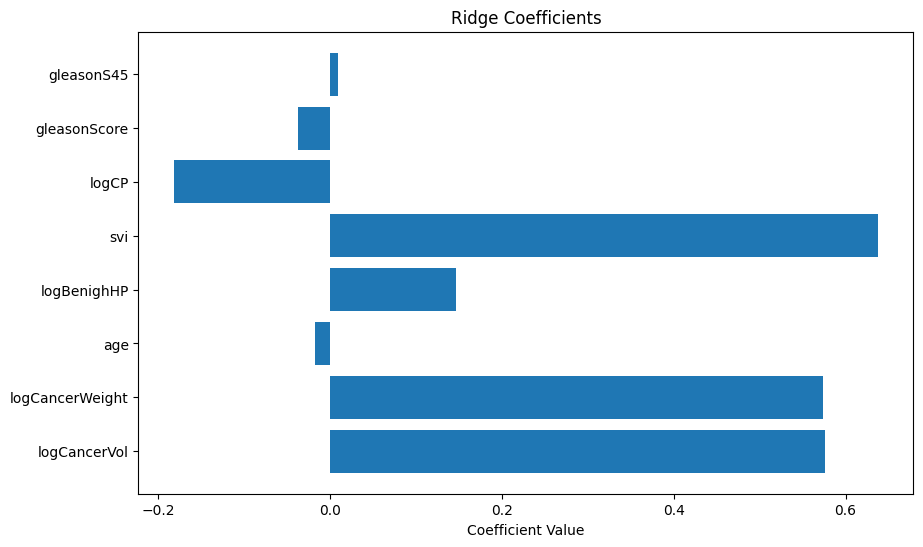

,Clinical Measures,Coefficients
0,logCancerVol,0.576105
1,logCancerWeight,0.574151
2,age,-0.018115
3,logBenighHP,0.146465
4,svi,0.638072
5,logCP,-0.182183
6,gleasonScore,-0.037758
7,gleasonS45,0.009533


In [ ]:
# Access the coefficients of the Lasso model
ridge_coefficients = ridge_model.coef_

# Get the names of the clinical measures
clinical_measure_names = X_train.columns
data_frame_ridge = pd.DataFrame(list(zip(clinical_measure_names, ridge_coefficients)), columns=['Clinical Measures','Coefficients'])
# Create a bar chart to visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(clinical_measure_names, ridge_coefficients)
plt.xlabel('Coefficient Value')
plt.title('Ridge Coefficients')
plt.show()
data_frame_ridge

---
**Lasso Model**

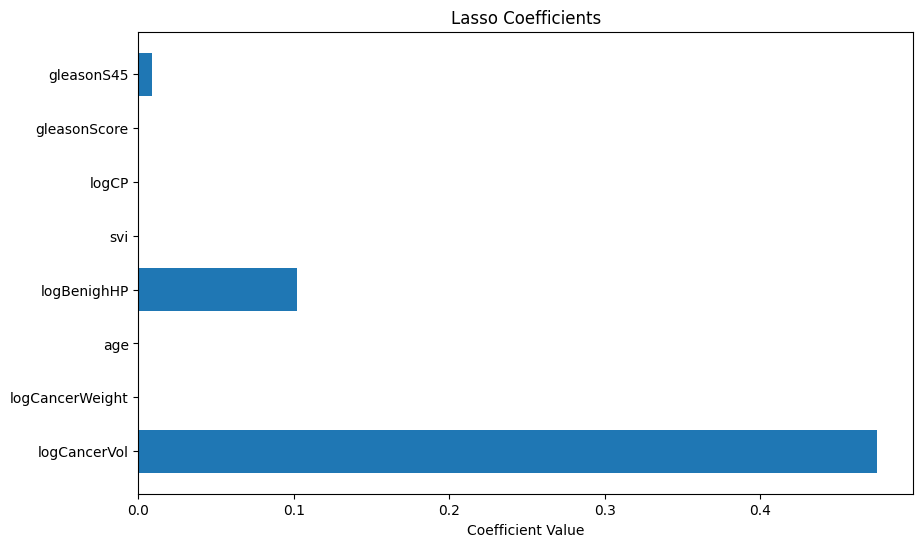

,Clinical Measures,Coefficients
0,logCancerVol,0.474935
1,logCancerWeight,0.000000
2,age,-0.000000
3,logBenighHP,0.102003
4,svi,0.000000
5,logCP,0.000000
6,gleasonScore,-0.000000
7,gleasonS45,0.008656


In [ ]:
# Access the coefficients of the Lasso model
lasso_coefficients = lasso_model.coef_

# Get the names of the clinical measures
clinical_measure_names = X_train.columns
data_frame_lasso = pd.DataFrame(list(zip(clinical_measure_names, lasso_coefficients)), columns=['Clinical Measures','Coefficients'])
# Create a bar chart to visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(clinical_measure_names, lasso_coefficients)
plt.xlabel('Coefficient Value')
plt.title('Lasso Coefficients')
plt.show()
data_frame_lasso

---

### Clinical measures mostly influencing the cancer antigen.

In [ ]:
# Creating a dictionary to map feature names to their coefficients
coefficients_dict = dict(zip(clinical_measure_names, ridge_coefficients))

# Sorting the coefficients by their absolute values in descending order
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Printing and interpret the coefficients
for feature, coefficient in sorted_coefficients:
    print(f'{feature}: {coefficient:.4f}')

# Identifying the important clinical measures based on non-zero coefficients
important_clinical_measures = [feature for feature, coefficient in sorted_coefficients if coefficient != 0]

print("Important Clinical Measures (non-zero coefficients):", important_clinical_measures)


svi: 0.6381
logCancerVol: 0.5761
logCancerWeight: 0.5742
logCP: -0.1822
logBenighHP: 0.1465
gleasonScore: -0.0378
age: -0.0181
gleasonS45: 0.0095
Important Clinical Measures (non-zero coefficients): ['svi', 'logCancerVol', 'logCancerWeight', 'logCP', 'logBenighHP', 'gleasonScore', 'age', 'gleasonS45']
